# Initial Necessary Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import specificity_score, sensitivity_score
from sklearn.utils import compute_class_weight, class_weight
from sklearn.model_selection import GridSearchCV

import graphviz
import pydotplus
from sklearn.datasets import make_classification

# First Look

In [2]:
initial_look_df = pd.read_csv('dataset.csv')
initial_look_df.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


# Understanding the dataset

In [3]:
print(initial_look_df.shape)

(43400, 12)


In [4]:
initial_look_df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [5]:
initial_look_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
initial_look_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
numerical_columns = list(initial_look_df.select_dtypes('number').columns)
categorical_columns = list(initial_look_df.select_dtypes(exclude='number').columns)
print("Numerical columns of the dataset",numerical_columns)
print("Categorical columns of the dataset",categorical_columns)

Numerical columns of the dataset ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Categorical columns of the dataset ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


# Exploratory Data Analysis

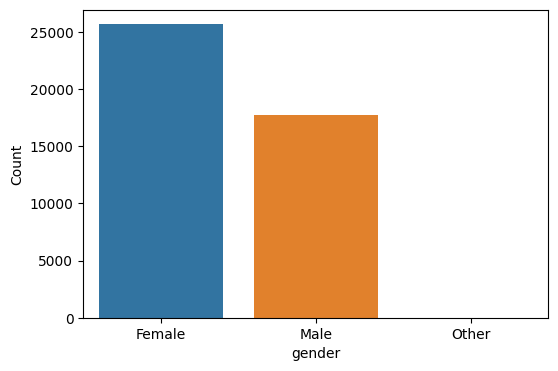

<Figure size 640x480 with 0 Axes>

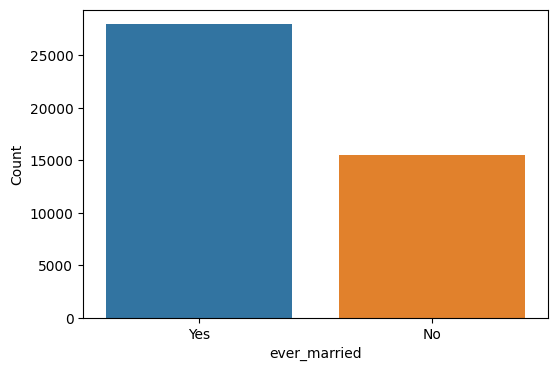

<Figure size 640x480 with 0 Axes>

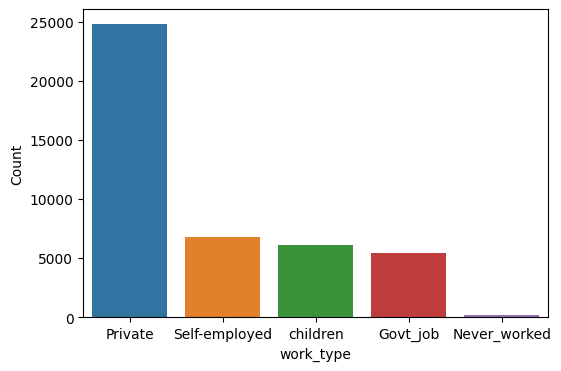

<Figure size 640x480 with 0 Axes>

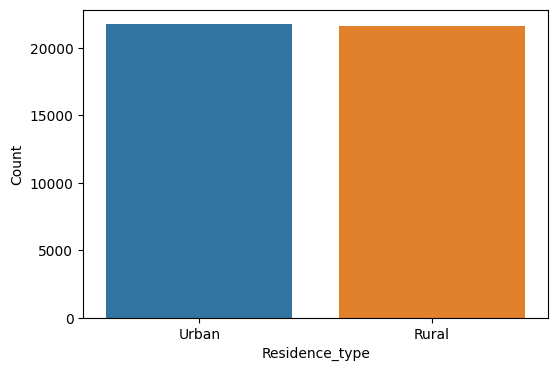

<Figure size 640x480 with 0 Axes>

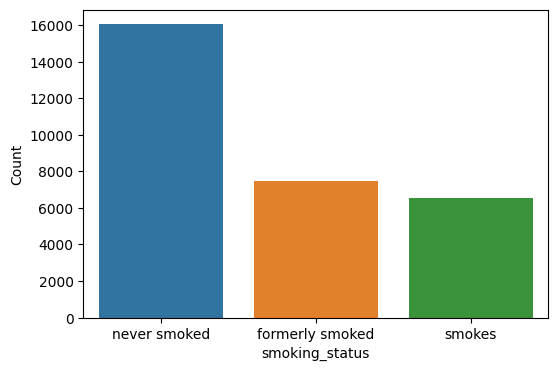

<Figure size 640x480 with 0 Axes>

In [8]:
for col in categorical_columns:
    fig, ax = plt.subplots(figsize = (6,4))
    plt1 = sns.countplot(data=initial_look_df, x=col, order=initial_look_df[col].value_counts().index)
    plt1.set(xlabel = col, ylabel= 'Count')
    plt.show()
    plt.tight_layout()

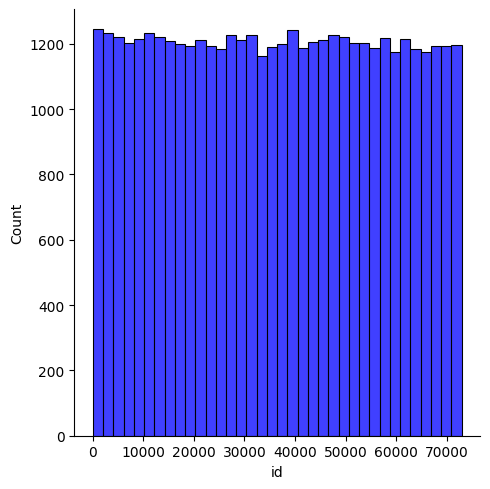

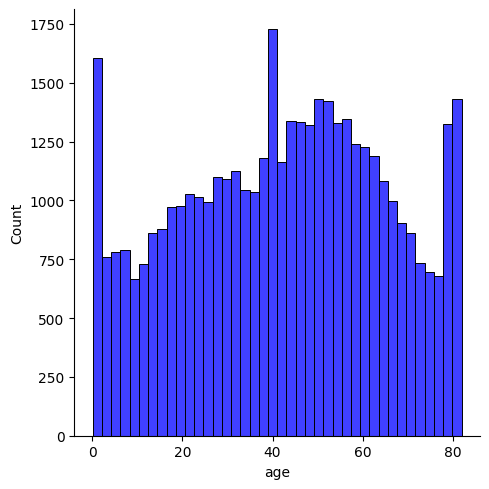

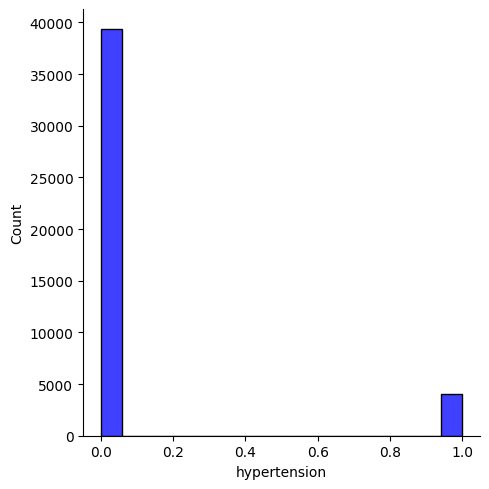

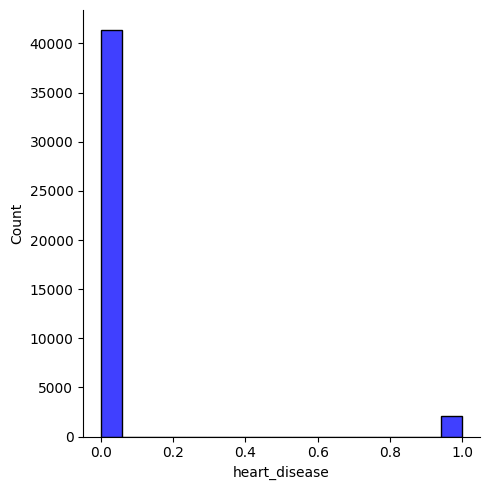

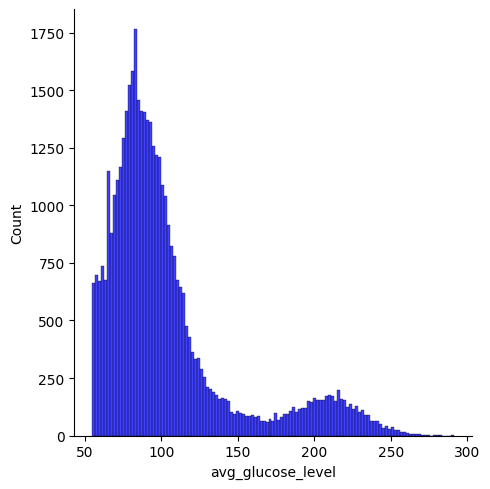

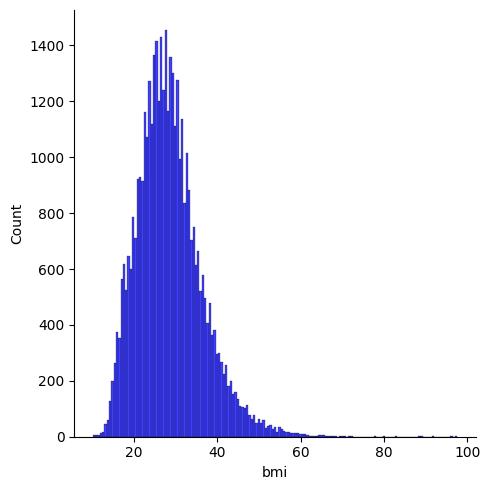

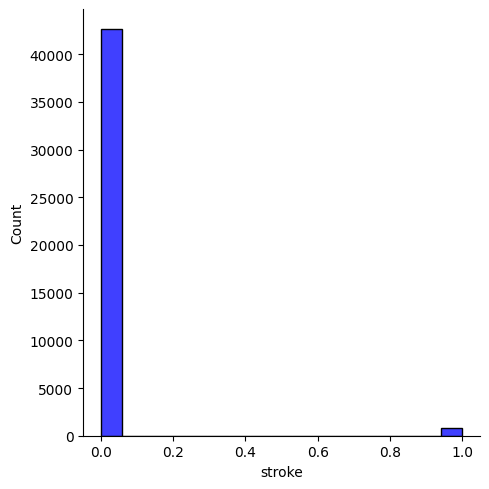

In [9]:
for col in numerical_columns:
    sns.displot(initial_look_df[col],color='blue')
    plt.show()

We are going to remove the outliers that do not make sense in the study.
We are going to study the variable 'bmi' and the 'avg_glucose_level'.

In [10]:
columns = ['hypertension','heart_disease','stroke']
initial_look_df[columns] = initial_look_df[columns].astype('category')

Text(0, 0.5, 'Value of Variable')

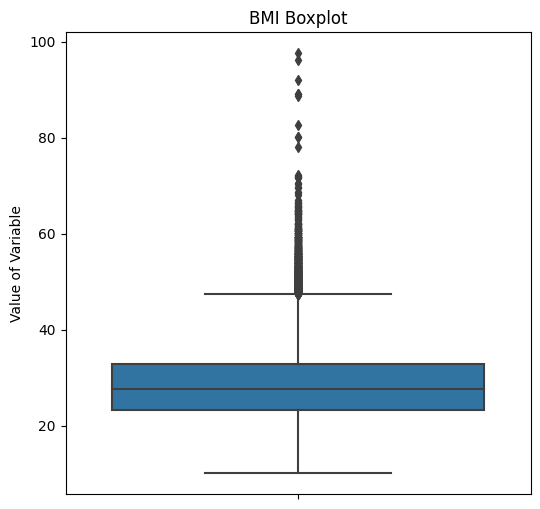

In [11]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=initial_look_df, y='bmi')
plt.title('BMI Boxplot')
plt.ylabel('Value of Variable')

Text(0, 0.5, 'Value of the variable')

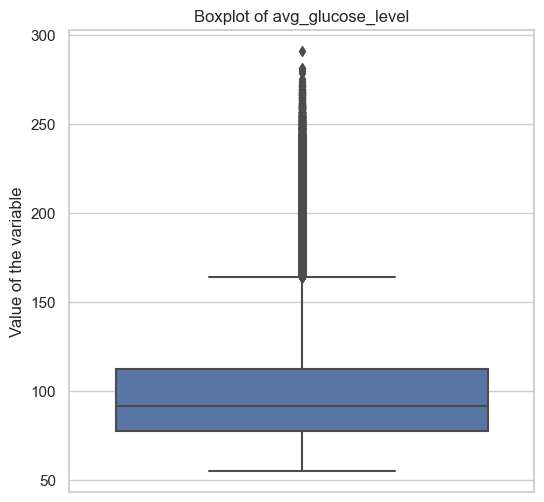

In [12]:
sns.set(style="whitegrid")  
plt.figure(figsize=(6, 6))
sns.boxplot(data=initial_look_df, y='avg_glucose_level')
plt.title('Boxplot of avg_glucose_level')
plt.ylabel('Value of the variable')

Let's see how many records are above 90 percentile.
For that We need to impute the missing values of 'bmi'

# Imputation of missing values
Columns with missing values are 'bmi' and 'smoking_status'
where 'bmi' is a numerical column and 'smoking_status' is a categorical column. Let's develop strategies to impute missing values.

Before doing that let's look closely into the the 'bmi' column

In [13]:
initial_look_df['bmi'].describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

In [14]:
initial_look_df['smoking_status'].describe()

count            30108
unique               3
top       never smoked
freq             16053
Name: smoking_status, dtype: object

In [15]:
x = initial_look_df.drop(columns=['id','stroke'])
y = initial_look_df['stroke']

In [16]:
transformer_list = [
    ('most_frequent',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),['bmi']),
    ('most_frequent2',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),['smoking_status'])
]
ct = ColumnTransformer(transformers=transformer_list,remainder='passthrough',verbose_feature_names_out=False)
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('most_frequent',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['bmi']),
                                ('most_frequent2',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['smoking_status'])],
                  verbose_feature_names_out=False)

In [17]:
x_clean = pd.DataFrame(ct.fit_transform(x),columns=ct.get_feature_names_out())

In [18]:
percentile_90_bmi = np.percentile(x_clean['bmi'], 90)
percentile_90_glucose = np.percentile(x_clean['avg_glucose_level'], 90)

print(f"The 90th Percentile of BMI is : {percentile_90_bmi}")
print(f"The 90th Percentile of avg_glucose_level: {percentile_90_glucose}")

The 90th Percentile of BMI is : 38.4
The 90th Percentile of avg_glucose_level: 180.95199999999997


In [19]:
print("Number of instances of stroke where bmi is above 38.4 : ",initial_look_df[(initial_look_df['bmi'] > percentile_90_bmi) & (initial_look_df['stroke'] == 1)]['id'].count())
print("Number of instances of stroke where avg_glucose_level is above 180.95 :",initial_look_df[(initial_look_df['avg_glucose_level'] > percentile_90_glucose) & (initial_look_df['stroke'] == 1)]['id'].count())

Number of instances of stroke where bmi is above 38.4 :  62
Number of instances of stroke where avg_glucose_level is above 180.95 : 225


These data cannot be removed from the study, as they represent an important part of the records that have experienced a stroke.

We are going to study the correlation of the numerical variables. In this case, we will only be able to observe the relationship between age, average glucose level, and body mass index (bmi)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_2064\3058615589.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = initial_look_df[numerical_columns].corr()


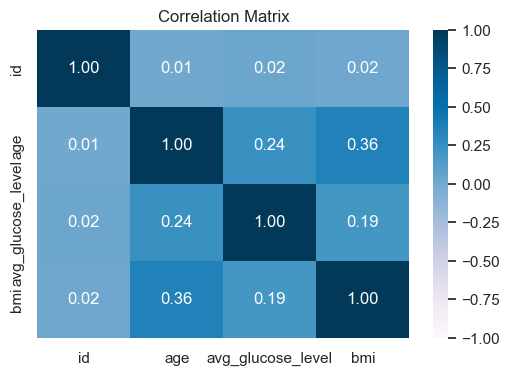

In [20]:
corr_matrix = initial_look_df[numerical_columns].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='PuBu',fmt='.2f',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()

We observe that all of them show a positive correlation, meaning that when one increases in one direction, the others also do so in that same direction. We are going to visually study these numerical variables and observe this correlation, which although positive, is not too high. To do this, we will create a scatter plot.

In [21]:
def scatter_plots(df, x_vars, y_var, scatter_color='blue', line_color='red'):
    num_plots = len(x_vars)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols

    plt.figure(figsize=(12, 5 * num_rows))

    for i, x_var in enumerate(x_vars):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.regplot(data=df, x=x_var, y=y_var, scatter_kws={'color': scatter_color}, line_kws={'color': line_color})
        plt.title(f'Scatter Plot with Linear Regression\n{x_var} vs. {y_var}')
    
    plt.tight_layout()
    plt.show()

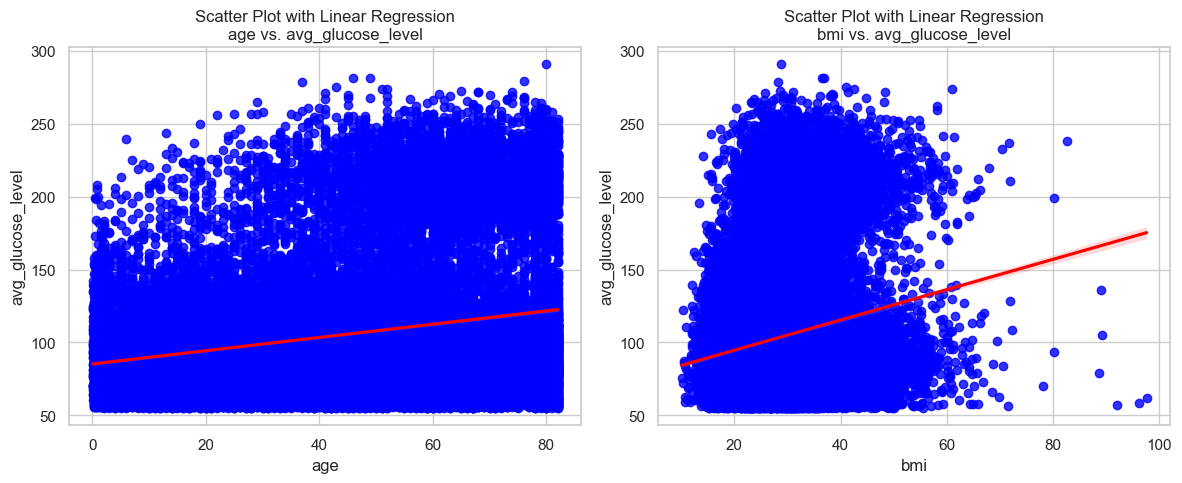

In [22]:
x_variables = ['age', 'bmi']
y_variable = 'avg_glucose_level'
scatter_plots(initial_look_df, x_variables, y_variable)

As mentioned, the correlation is very low in these cases, at 24% and 19% respectively. There isn't a clear trend observed, so we can say that they exhibit a weak positive correlation.

Analyzing the distribution

In [23]:
def plot_histograms(df, variables):
    num_variables = len(variables)

    fig, axes = plt.subplots(1, num_variables, figsize=(6 * num_variables, 4))
    for i, variable in enumerate(variables):
        sns.histplot(data=df, x=variable, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram with Density Curve\n{variable}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

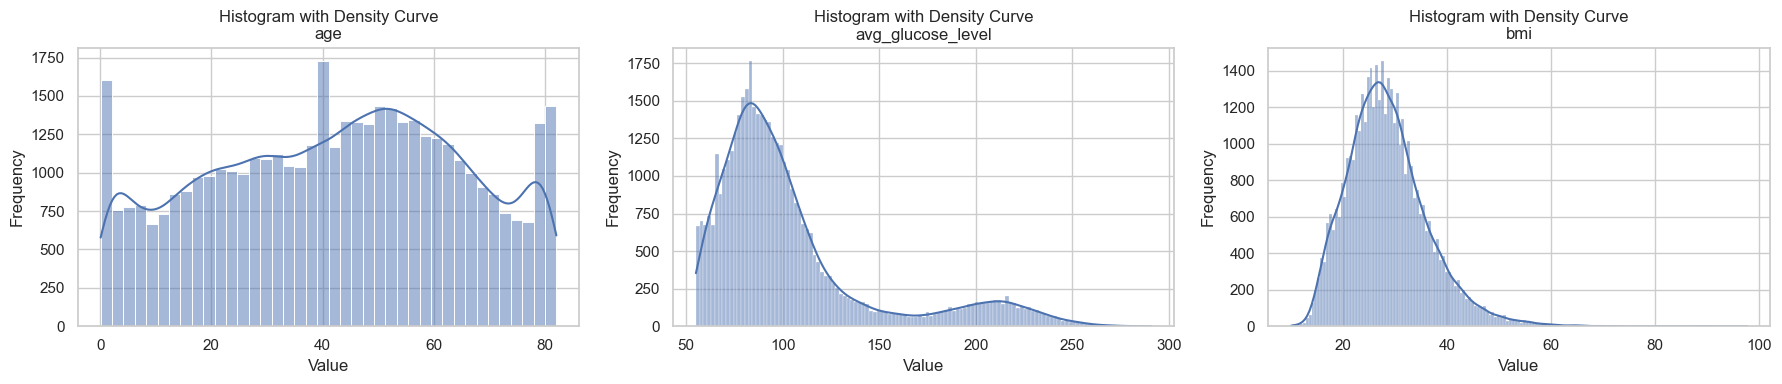

In [24]:
variables = ['age', 'avg_glucose_level', 'bmi']
plot_histograms(initial_look_df, variables)

From the plots, we can draw several conclusions:

* The age range spans from 0 years to 80 years. There is a higher number of data points as age increases, up until around 50, after which there is a slight decrease in numbers up to 80 years old.

* The average glucose level is quite explanatory. The majority of the data falls between 50 and 100, which is considered normal. This means that the subjects are healthy in this regard. Between 100 and 150, it's diagnosed as pre-diabetes, and above that range is considered diabetes. Thus, a portion of our sample either has diabetes or at least has a glucose level higher than recommended.

* Finally, the body mass index (BMI) has most of its records between 20 and 40. A BMI between 20 and 25 is considered healthy, between 25 and 30 is considered overweight, and above that value, it's diagnosed as obesity. Therefore, we can see that in this sample, there are subjects falling into all of these categories we just mentioned.

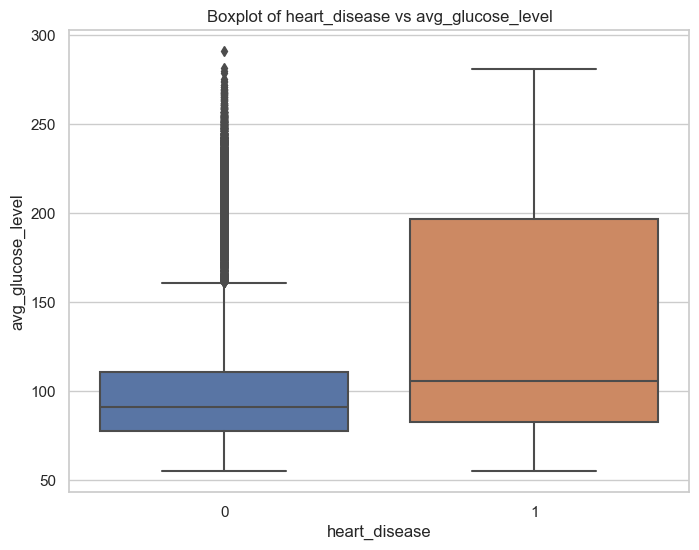

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='heart_disease', y='avg_glucose_level', data=initial_look_df)
plt.title('Boxplot of heart_disease vs avg_glucose_level')
plt.show()

A significant finding regarding the average glucose level in patients diagnosed with previous heart conditions is that it is much higher than in patients who have not experienced such conditions. Furthermore, as observed earlier, the percentage of patients with heart conditions was much lower than those who hadn't experienced it. This suggests that, from this small sample, we observe very high blood glucose levels. Fifty percent of these patients have glucose levels above 100 mg/dL, which is referred to as the normal range.

In [26]:
x_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bmi                43400 non-null  object
 1   smoking_status     43400 non-null  object
 2   gender             43400 non-null  object
 3   age                43400 non-null  object
 4   hypertension       43400 non-null  object
 5   heart_disease      43400 non-null  object
 6   ever_married       43400 non-null  object
 7   work_type          43400 non-null  object
 8   Residence_type     43400 non-null  object
 9   avg_glucose_level  43400 non-null  object
dtypes: object(10)
memory usage: 3.3+ MB


# Let's deal with the categorical variables

One Hot Encoding of Categorical Variables

In [27]:
categorical_transformer_list = [
    ('ohe',OneHotEncoder(),categorical_columns)
]
ct2 = ColumnTransformer(categorical_transformer_list,remainder='passthrough')

In [28]:
x_cat_clean = ct2.fit_transform(x_clean)
x_cat_clean.shape

(43400, 20)

---------------------------------------------------------------------------------------------------------------------

In [29]:
pos_class = initial_look_df[(initial_look_df['stroke'] == 1)]
neg_class = initial_look_df[(initial_look_df['stroke'] == 0)]
print("People who went through a stroke : ",pos_class.shape[0])
print("People who didn't go through a stroke : ",neg_class.shape[0])

People who went through a stroke :  783
People who didn't go through a stroke :  42617


# Clearly there's a class imbalance in the dataset

# Class Imbalance Fix #1

We will deal with this class imbalance using class weights.

In [30]:
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y)
print(class_weights)

[ 0.50918647 27.71392082]


# Initial Model Training

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_cat_clean,y,test_size=0.2,random_state=42,stratify=y)

In [32]:
log_reg = LogisticRegression(max_iter=5000,class_weight={0:class_weights[0],1:class_weights[1]})
log_reg.fit(x_train,y_train)

LogisticRegression(class_weight={0: 0.5091864748809161, 1: 27.713920817369093},
                   max_iter=5000)

In [33]:
preds = log_reg.predict(x_test)

In [43]:
print("Initial accuracy score using logisitic regression is ", accuracy_score(y_test,preds))
print("Initial specificity score using logisitic regression is ", specificity_score(y_test,preds))
print("Initial sensitivity score using logisitic regression is ", sensitivity_score(y_test,preds))


Initial accuracy score using logisitic regression is  0.7443548387096774
Initial specificity score using logisitic regression is  0.743282881614455
Initial sensitivity score using logisitic regression is  0.802547770700637


Model lacks in sensitivity which is very important for the prediction of positive or onset of stroke

The classification tree is a suitable option when you are trying to predict a categorical target variable (in this case, whether a person has had a stroke or not) based on a set of features (independent variables) that can be both numeric and categorical.

First, we add the necessary libraries for this study.

# Class Imbalance Fix #2


Instead of using classweights, let's use : 
Oversampling of the minority class using SMOTE.

In [35]:
smote = SMOTE(sampling_strategy=0.035, random_state=123)
x_balanced, y_balanced = smote.fit_resample(x_cat_clean, y) 

Resplitting

In [36]:
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_balanced, y_balanced, test_size=0.25, random_state=123)

# Decision Tree : Hyperparameter-Tuning

In [37]:
clf = DecisionTreeClassifier(random_state=42) 
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x_over_train, y_over_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_clf = grid_search.best_estimator_
best_clf.fit(x_over_train, y_over_train)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

# Model Evaluation

In [38]:
y_prob = best_clf.predict_proba(x_over_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_over_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC Score: {roc_auc}")

AUC-ROC Score: 0.8368297084466111


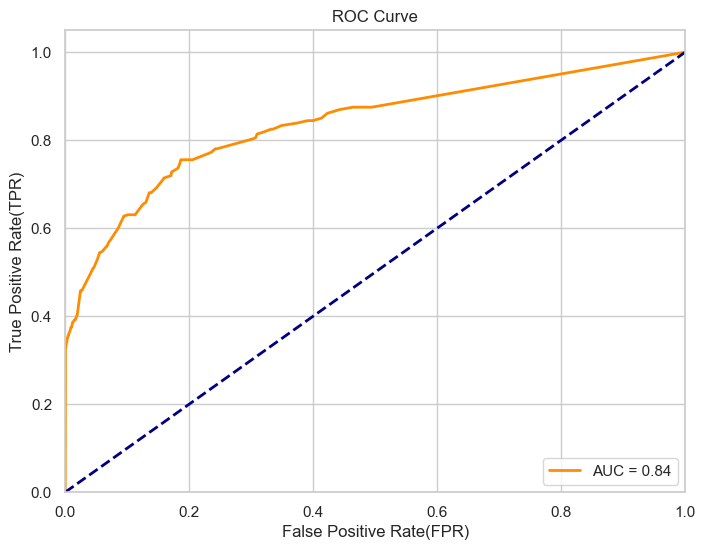

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [44]:
y_pred = (y_prob > roc_auc).astype(int)
accuracy = accuracy_score(y_over_test, y_pred)
print("Accuracy of the model:", accuracy)

report = classification_report(y_over_test, y_pred)
print("Classification report : ")
print(report)

conf_matrix = confusion_matrix(y_over_test, y_pred)
print("Confusion Matrix")
print(conf_matrix)
print("Sensitivity score of the decision tree classifier",sensitivity_score(y_over_test,y_pred))
print("Specificity score of the decision tree classifier",specificity_score(y_over_test,y_pred))

Accuracy of the model: 0.9776004352951846
Classification report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10667
           1       0.97      0.33      0.49       360

    accuracy                           0.98     11027
   macro avg       0.97      0.66      0.74     11027
weighted avg       0.98      0.98      0.97     11027

Confusion Matrix
[[10663     4]
 [  243   117]]
Sensitivity score of the decision tree classifier 0.325
Specificity score of the decision tree classifier 0.9996250117183838
